In [1296]:
#Import Necessary Libraries
%matplotlib inline
import subprocess
import pandas as pd;
import numpy as np
from pandas import ExcelWriter
import matplotlib.pyplot as plt;
from matplotlib import gridspec
from matplotlib.backends.backend_pdf import PdfPages

In [1297]:
#Define All Necessary Functions
def import_csv(csv):
    data = pd.read_csv(csv)
    data = data.fillna("") #In case people don't answer at all.
    data = pd.DataFrame(data)
    return data

#I could add colors in the constructor here
def crunch_numbers(raw_data, question, answers):
    category_data = raw_data[question]
    sub_category_counts = []
    sub_category_labels = []
    final_array = []
    for x in range(len(answers)):
        sub_cat_data = category_data[category_data==answers[x]]
        if(len(sub_cat_data.value_counts())>0):
            sub_category_counts.append(sub_cat_data.value_counts()[0])
        else:
            sub_category_counts.append(0)
    total_sub_category_counts = sum(sub_category_counts)
    
    for x in range(len(answers)):
        sub_category_labels.append(answers[x]+": \n" + str(round(float(sub_category_counts[x])/(total_sub_category_counts)*100,1)) + "%")
    final_array.append(sub_category_counts)
    final_array.append(sub_category_labels)
    return final_array

#I could add colors in the constructor here
def crunch_numbers_multi(raw_data, condition_question, condition, question, answers):
    sub_category_counts = []
    sub_category_labels = []
    final_array = []
        
    category_data = data[data[condition_question]==condition]
    
    for x in range(len(answers)):
        sub_cat_data = category_data[category_data[question]==answers[x]]
        sub_cat_data = sub_cat_data[question]
        if(len(sub_cat_data.value_counts())>0):
            sub_category_counts.append(sub_cat_data.value_counts()[0])
        else:
            sub_category_counts.append(0)
    
    total_sub_category_counts = sum(sub_category_counts)                                        
                                 
    for x in range(len(answers)):
        sub_category_labels.append(answers[x]+": \n" + str(round(float(sub_category_counts[x])/(total_sub_category_counts)*100,1)) + "%")
    
    final_array.append(sub_category_counts)
    final_array.append(sub_category_labels)
    return final_array
    
def visualize_single_bar(data_set):
    pos = np.arange(len(data_set[0]))+.2
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(111)
    #ax.autoscale(enable=True, axis= 'x', tight = True)
    ax.set_ylim(0, len(data_set[0]))
    ax.set_xlim(0,max(data_set[0])+.2)

    ax.barh(pos, data_set[0], height = .5)
    ax.set_yticklabels(data_set[1], fontsize=20)
    ax.set_yticks(pos+.2)
    ax.get_xaxis().set_visible(True)
    RUNS = np.arange(max(data_set[0])+1)
    ax.set_xticks(RUNS)
    
def visualize_double_bar(data_set1, data_set2, title1, title2):
    pos = np.arange(len(data_set1[0]))+.2
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize = (20,7))
    #ax1.autoscale(enable=True, axis= 'x', tight = True)
    ax1.set_ylim(0, len(data_set1[0]))
    ax1.set_xlim(0,max(data_set1[0])+.1)

    ax1.barh(pos, data_set1[0], height = .5)
    ax1.set_yticklabels(data_set1[1], fontsize=15)
    ax1.set_yticks(pos+.2)
    ax1.get_xaxis().set_visible(True)
    RUNS = np.arange(max(data_set1[0])+1)
    ax1.set_xticks(RUNS)
    ax1.set_title(title1, fontweight = "bold", fontsize=20)

    pos = np.arange(len(data_set2[0]))+.2
    #ax2.autoscale(enable=True, axis= 'x', tight = True)
    ax2.set_ylim(0, len(data_set2[0]))
    ax2.set_xlim(0,max(data_set2[0])+.1)

    ax2.barh(pos, data_set2[0], height = .5)
    ax2.set_yticklabels(data_set2[1], fontsize=15)
    ax2.set_yticks((pos+.2))
    ax2.get_xaxis().set_visible(True)
    RUNS = np.arange(max(data_set2[0])+1)
    ax2.set_xticks(RUNS)
    ax2.set_title(title2, fontweight = "bold", fontsize=20)
    
def visualize_triple_bar(data_set1, data_set2, data_set3, title1, title2, title3):
    pos = np.arange(len(data_set1[0]))+.2
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=False, figsize = (15,5))
    #ax1.autoscale(enable=True, axis= 'x', tight = True)
    ax1.set_ylim(0, len(data_set1[0]))
    ax1.set_xlim(0,max(data_set1[0])+.1)

    ax1.barh(pos, data_set1[0], height = .5)
    ax1.set_yticklabels(data_set1[1], fontsize=10)
    ax1.set_yticks(pos+.2)
    ax1.get_xaxis().set_visible(True)
    RUNS = np.arange(max(data_set1[0])+1)
    ax1.set_xticks(RUNS)
    ax1.set_title(title1, fontweight = "bold", fontsize=20)

    pos = np.arange(len(data_set2[0]))+.2
    #ax2.autoscale(enable=True, axis= 'x', tight = True)
    ax2.set_ylim(0, len(data_set2[0]))
    ax2.set_xlim(0,max(data_set2[0])+.1)

    ax2.barh(pos, data_set2[0], height = .5)
    ax2.set_yticklabels(data_set2[1], fontsize=10)
    ax2.set_yticks((pos+.2))
    ax2.get_xaxis().set_visible(True)
    RUNS = np.arange(max(data_set2[0])+1)
    ax2.set_xticks(RUNS)
    ax2.set_title(title2, fontweight = "bold", fontsize=20)
    
    pos = np.arange(len(data_set3[0]))+.2
    #ax3.autoscale(enable=True, axis= 'x', tight = True)
    ax3.set_ylim(0, len(data_set3[0]))
    ax3.set_xlim(0,max(data_set3[0])+.1)

    ax3.barh(pos, data_set3[0], height = .5)
    ax3.set_yticklabels(data_set3[1], fontsize= 10)
    ax3.set_yticks((pos+.2))
    ax3.get_xaxis().set_visible(True)
    RUNS = np.arange(max(data_set3[0])+1)
    ax3.set_xticks(RUNS)
    ax3.set_title(title3, fontweight = "bold", fontsize=20)

In [1298]:
#Import RAW Data
data = import_csv("PollData.csv")
data = data.pivot('ID', 'Poll Title', 'Response')

#Set Question Info Here
gender_question = "What is your gender?"
gender_choice_Male = "Male"
gender_choice_Female = "Female"
gender_answers = [gender_choice_Female, gender_choice_Male]

age_range_question = "What is your age range?"
age_range_choice_under40 = "under 40"
age_range_choice_40_59 = "40-59"
age_range_choice_over60 = "over 60"
age_range_answers = [age_range_choice_over60, age_range_choice_40_59, age_range_choice_under40]

party_question = "What is your party of registration?"
party_choice_Democrat = "Democrat"
party_choice_Republican = "Republican"
party_choice_Independent = "Independent"
party_choice_other = "other or not registered"
party_answers = [ party_choice_other, party_choice_Independent, party_choice_Republican, party_choice_Democrat]

president_question = "Who are you voting for in this year's Presidential election?"
president_choice_clinton = "Clinton"
president_choice_trump = "Trump"
president_choice_other = "Other"
president_answers = [president_choice_other, president_choice_trump, president_choice_clinton]

house_question="Who do you prefer to control the House of Representatives?"
house_choice_democrat = "Democrats"
house_choice_republicans = "Republicans"
house_answers = [house_choice_republicans, house_choice_democrat]

senate_question="Who do you prefer to control the Senate?"
senate_choice_democrat = "Democrats"
senate_choice_republicans = "Republicans"
senate_answers = [senate_choice_republicans, senate_choice_democrat]


# Are you Male or Female?

In [1299]:
#Aggregate Gender Data
gender_data = crunch_numbers(data, gender_question, gender_answers) 

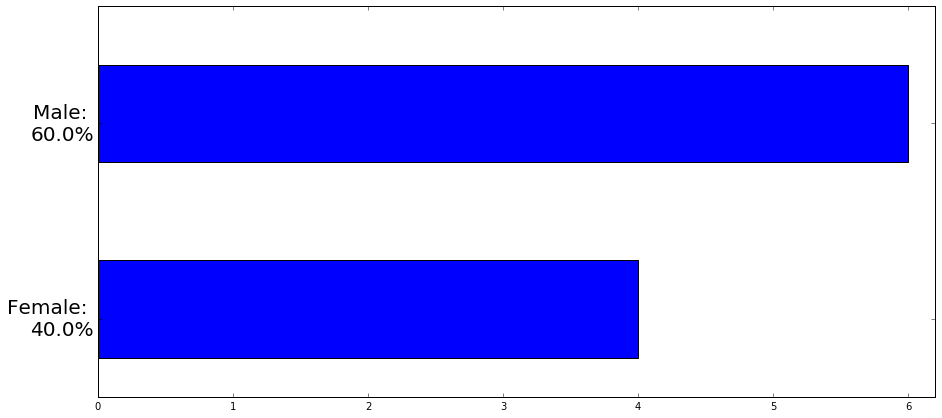

In [1300]:
visualize_single_bar(gender_data)

# What is your age range?

In [1301]:
#Aggregate Age Data
age_range_data = crunch_numbers(data,age_range_question, age_range_answers)

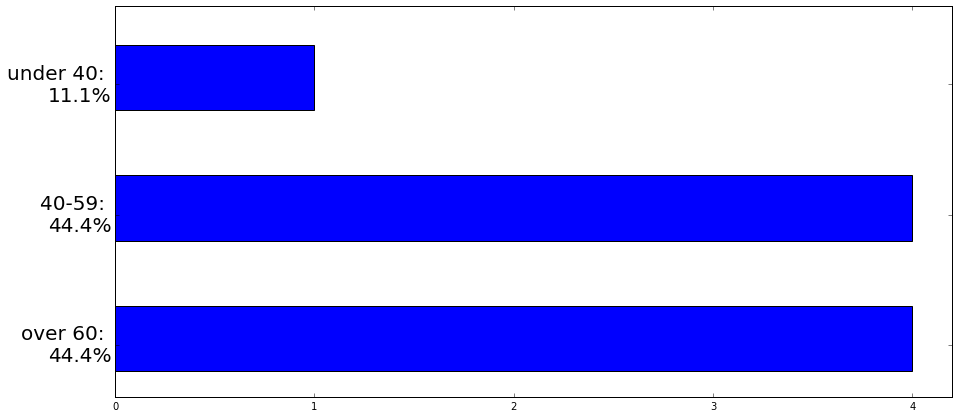

In [1302]:
visualize_single_bar(age_range_data)

# What is your party of registration?

In [1303]:
#Aggregate Party Registration Data
party_data = crunch_numbers(data, party_question, party_answers)

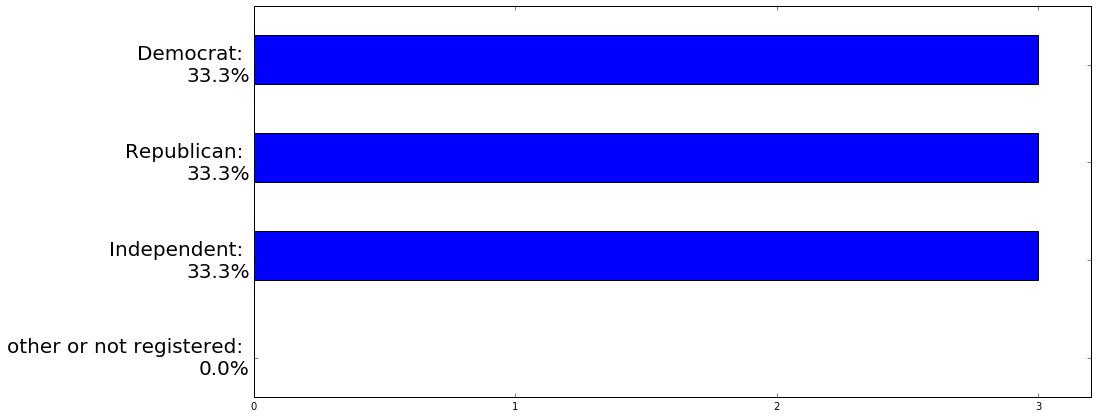

In [1304]:
visualize_single_bar(party_data)

## Party Affiliation by Gender

In [1305]:
#
female_voter_data = crunch_numbers_multi(data, gender_question,gender_choice_Female, party_question, party_answers)
male_voter_data = crunch_numbers_multi(data, gender_question, gender_choice_Male, party_question, party_answers)

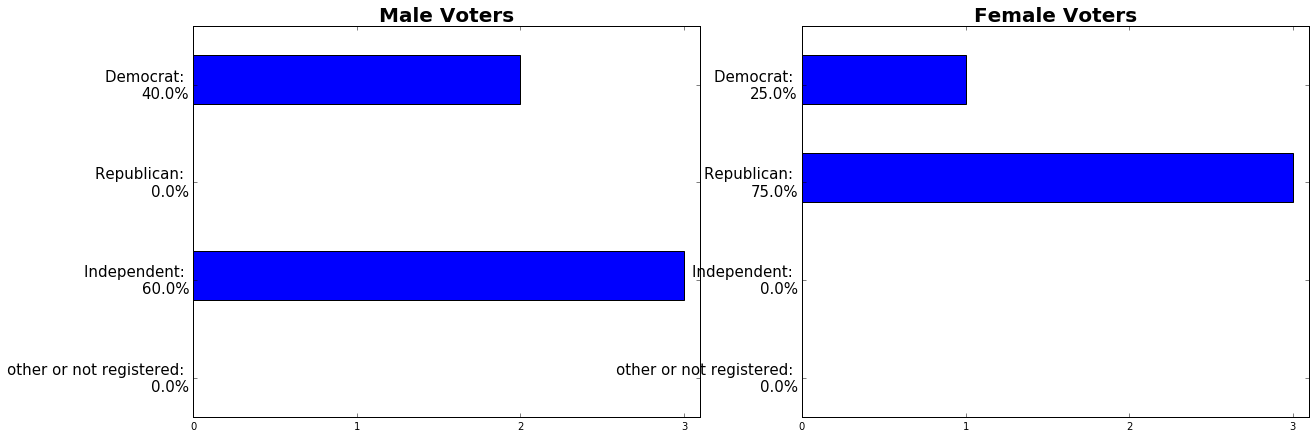

In [1306]:
visualize_double_bar(male_voter_data,female_voter_data, "Male Voters", "Female Voters")

# Who are you voting for in this year's presidential election?

In [1307]:
#Aggregate Presidential Candidate Registration Data
president_data = crunch_numbers(data, president_question, president_answers)

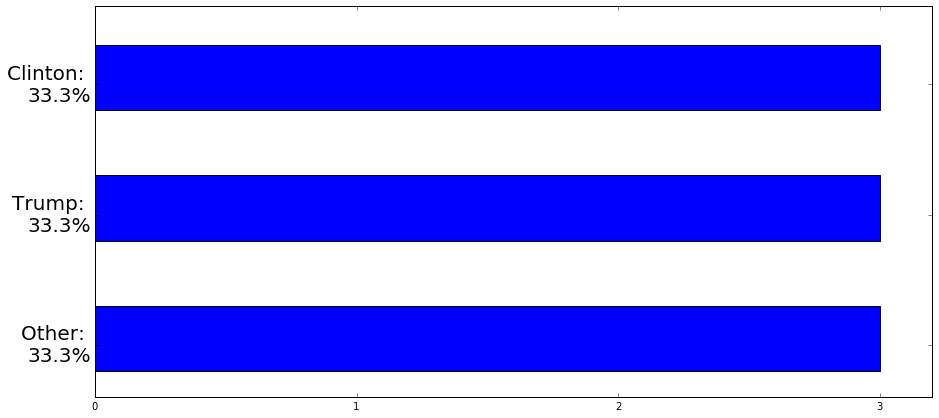

In [1308]:
visualize_single_bar(president_data)

## Presidential Candidate by Gender

In [1309]:
female_president_choice = crunch_numbers_multi(data, gender_question, gender_choice_Female, president_question, president_answers)
male_president_choice = crunch_numbers_multi(data, gender_question, gender_choice_Male, president_question, president_answers)

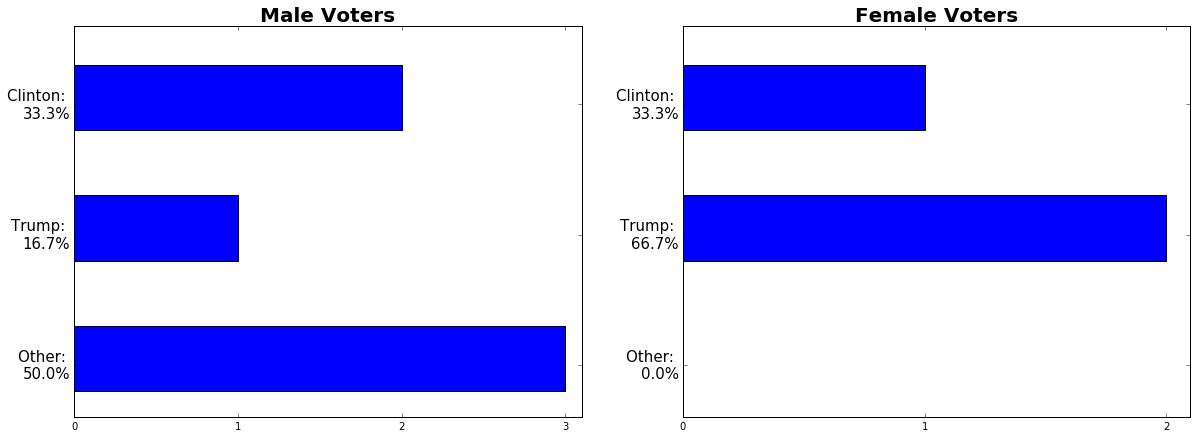

In [1310]:
visualize_double_bar(male_president_choice, female_president_choice, "Male Voters", "Female Voters")

# Presidential Candidate By Age Group

In [1311]:
young_voters_candidate = crunch_numbers_multi(data, age_range_question, age_range_choice_under40, president_question, president_answers)
middle_aged_voters_candidate = crunch_numbers_multi(data, age_range_question, age_range_choice_40_59, president_question, president_answers)
older_voters_candidate = crunch_numbers_multi(data, age_range_question, age_range_choice_over60, president_question, president_answers)

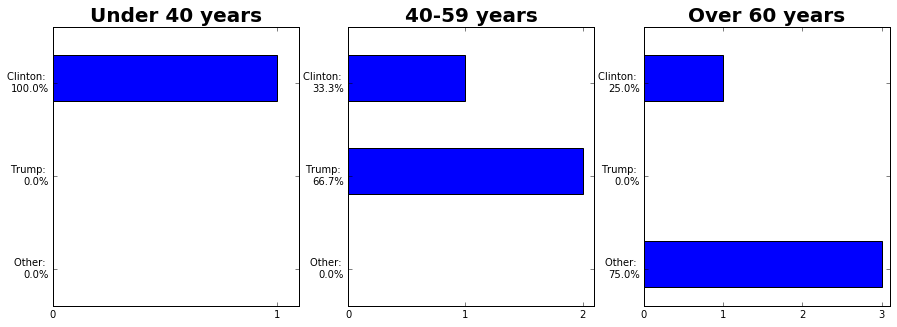

In [1312]:
visualize_triple_bar(young_voters_candidate, middle_aged_voters_candidate, older_voters_candidate, "Under 40 years", "40-59 years", "Over 60 years")

# Who do you prefer to win the House of Representatives?

In [1313]:
house_data = crunch_numbers(data, house_question, house_answers)

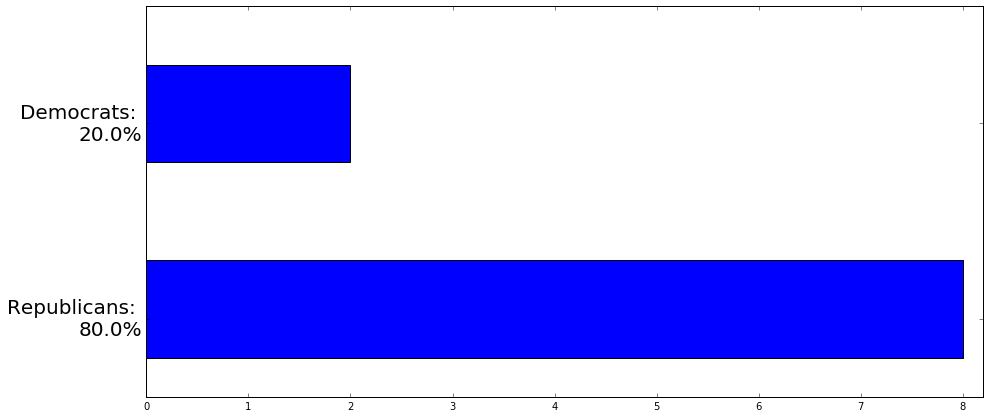

In [1314]:
visualize_single_bar(house_data)

# Who do you prefer to win the Senate?

In [1315]:
senate_data = crunch_numbers(data, senate_question, senate_answers)

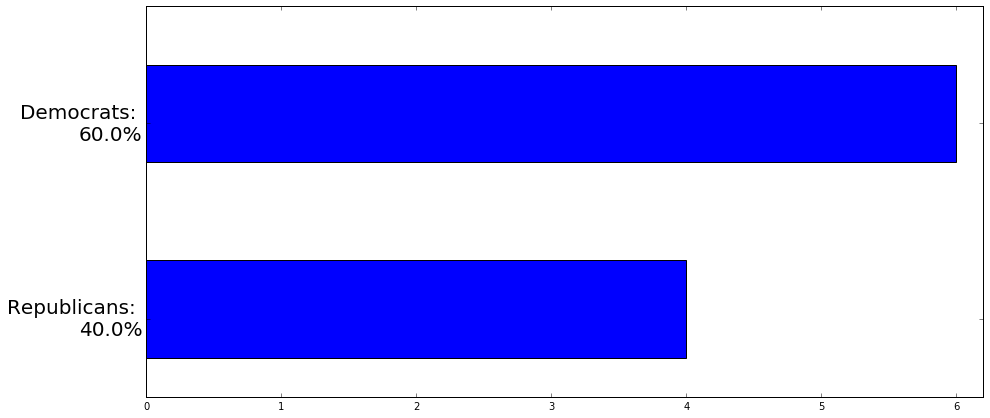

In [1316]:
visualize_single_bar(senate_data)